# Capstone Project: The Battle of the Neighborhoods
### Applied Data Science Capstone

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

An entrepreneur is looking for an ideal location to target for a new Ice Cream Shop in an area within Fairfax County, Virginia. <br> 

He wants to use a quantitative approach to identify the 3 best locations within the target search area. He will then pick his prefered location from these 3 identified locations. <br>

His selection criteria includes:  <br>
- Low Ice Cream Shops per capita<br>
- Located in a commercial area <br>
- High foot traffic<br>



## Data <a name="data"></a>

This problem can be solved using population data, location data and other datasets and applying some algorithms to best address the entrepreneur's selection criteria.<br>

Data to be used in this analysis:<br>

- The most recent population data will be extracted from Fairfax County, Virginia Open Geospatial Data web site http://data-fairfaxcountygis.opendata.arcgis.com/datasets/314bfe4019754952a715be3a33384d9d_0.csv.<br>
  -  The population data contains the average population per household along with each household geographic location.<br>
  -  Data will first need to be reviewed and cleaned.<br>
- The Fairfax County boundary will also be extracted from Fairfax County, Virginia Open Geospatial Data web site https://opendata.arcgis.com/datasets/58cf8abd870e47aeb1be8911983d2d44_15.geojson.<br>
- To identify commercial areas within the Target area, Land Use data of Fairfax county will be extracted from ArcGIS Open Data web site https://opendata.arcgis.com/datasets/64abd9d8f80146a4924727dc42dfba86_0.geojson.<br>

Once the data is collected, processed and explored, an in-depth analysis will be performed and conclusions will be drawn. The results will then be communicated to the entrepreneur for feedback.<br>


## Methodology <a name="methodology"></a>

- The search area targeted by the entrepreneur includes just a small section within the county. A polygon representing this area will therefore be created to filter only the population within the target search area.<br>
- The target area polygon will then be divided into a grid of equal sized clusters representing sub-neighborhoods.<br>
- The population count sum of each sub-neighborhood will then be computed and assigned to the cluster's centroid location.<br> 
- Venue data will be extracted from the Foursquare location data, reviewed and structured.
- Land use data will then be filtered and mapped to display only commercial areas within the target search area.<br>
- A selection will be made by process of elimination. We will eliminate clusters without commercial areas, then clusters with high Ice Cream shops per capita and finally we will select the best 3 locations out of the remaining clusters based on general knowledge of the foot traffic in those clusters.

## Analysis <a name="analysis"></a>

### Aquiring county population data

In [1]:
import pandas as pd

df_FFXpops = pd.read_csv('Current_Population.csv')
df_FFXpops.head()

,X,Y,OBJECTID,PIN,PARCE_ID,CURRE_POPUL,LOW_ESTIM_POPUL,HIGH_ESTIM_POPUL,VALID_FROM,VALID_TO
0,-77.241452,38.897249,1,0393 28 0084,314692,3.0423,2.8774,3.2093,NaN,2019-01-01T05:00:00.000Z
1,-77.241194,38.897127,2,0393 28 0085,285535,3.0423,2.8774,3.2093,NaN,2019-01-01T05:00:00.000Z
2,-77.240933,38.897012,3,0393 28 0086,356281,3.0423,2.8774,3.2093,NaN,2019-01-01T05:00:00.000Z
3,-77.240667,38.896900,4,0393 28 0087,228776,3.0423,2.8774,3.2093,NaN,2019-01-01T05:00:00.000Z
4,-77.240376,38.896784,5,0393 28 0088,333761,3.0423,2.8774,3.2093,NaN,2019-01-01T05:00:00.000Z


### Cleaning county population data

In [2]:
# Selecting data to be used and restructuring it

df_FFXpopsRev=df_FFXpops[['X', 'Y','OBJECTID','CURRE_POPUL']]
df_FFXpopsRev.columns =['Longitude', 'Latitude','ID','Pop']
df_pops = df_FFXpopsRev[['ID', 'Latitude', 'Longitude','Pop']]
df_pops.head()


,ID,Latitude,Longitude,Pop
0,1,38.897249,-77.241452,3.0423
1,2,38.897127,-77.241194,3.0423
2,3,38.897012,-77.240933,3.0423
3,4,38.896900,-77.240667,3.0423
4,5,38.896784,-77.240376,3.0423


In [3]:
# Check dataframe
df_pops.info()
df_pops.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333075 entries, 0 to 333074
Data columns (total 4 columns):
ID           333075 non-null int64
Latitude     333075 non-null float64
Longitude    333075 non-null float64
Pop          333075 non-null float64
dtypes: float64(3), int64(1)
memory usage: 10.2 MB


(333075, 4)

In [4]:
# Get Fairfax county total population

p= round(df_pops['Pop'].sum(),0)
print ("Fairfax County Total Population is: {:,}".format(p))

Fairfax County Total Population is: 1,166,965.0


### Mapping to visualize Fairfax County and the area of interest.

In [5]:
# Get centroid coordinates of Fairfax county

from geopy.geocoders import Nominatim

address = 'Fairfax,VA'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Fairfax are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Fairfax are 38.8462236, -77.3063733.


In [81]:
from folium.features import GeoJson
import folium
import webbrowser
import webbrowser


map_Fairfax = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add county boundary to the map
url2="https://opendata.arcgis.com/datasets/58cf8abd870e47aeb1be8911983d2d44_15.geojson"
GeoJson(url2, smooth_factor=0.5).add_to(map_Fairfax)


# Create a polygon for the area of interest and add it to the map

import geopandas as gpd
from shapely.geometry import Polygon

lat_point_list = [38.96, 38.96, 38.88, 38.88]
lon_point_list = [-77.2, -77.41, -77.41, -77.2]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
print(polygon.geometry)

#polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
#polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

folium.GeoJson(
    polygon,
    style_function=lambda feature: {
        'fillColor': 'Red',
        'color' : 'Red',
        'weight' : 1,
        'fillOpacity' : 0.5,
        }
    ).add_to(map_Fairfax)

print ("County boundary in Blue & search area in Red".format(p))

# save as html 
map_Fairfax.save('map_Fairfax.html')


from IPython.display import IFrame
IFrame(src='map_Fairfax.html', width=900,height=600)


C:\Users\bimit\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


0    POLYGON ((-77.20000 38.96000, -77.41000 38.960...
Name: geometry, dtype: geometry
County boundary in Blue & search area in Red


In [6]:
# calculating the search area dimensions

from haversine import haversine

L = haversine((38.96, -77.2),(38.96, -77.41), unit='m')
W = haversine((38.96, -77.2),(38.88, -77.2), unit='m')
Area = L * W

print("The length of the rectangle is: {:,.10} meters".format(L))
print("The width of the rectangle is: {:,.10} meters".format(W))
print("The Area of the rectangle is: {:,.10} square meters".format(Area))

The length of the rectangle is: 18,157.36035 meters
The width of the rectangle is: 8,895.606419 meters
The Area of the rectangle is: 161,520,731.3 square meters


### Dividing the search area into a grid of an equal sized clusters

In [7]:
import shapely.geometry
import pyproj

# Set up projections
p_ll = pyproj.Proj(init='epsg:4326')
p_mt = pyproj.Proj(init='epsg:3857') # metric; same as EPSG:900913


# Create corners of rectangle to be transformed to a grid
nw = shapely.geometry.Point((-77.41, 38.88))
se = shapely.geometry.Point((-77.2, 38.96))


stepsize = 2320 # 2.320 km grid step size

# Project corners to target projection
s = pyproj.transform(p_ll, p_mt, nw.x, nw.y) # Transform NW point to 3857
e = pyproj.transform(p_ll, p_mt, se.x, se.y) # .. same for SE

# Iterate over 2D area
gridpoints = []
x = s[0]
while x < e[0]:
    y = s[1]
    while y < e[1]:
        p = shapely.geometry.Point(pyproj.transform(p_mt, p_ll, x, y))
        gridpoints.append(p)
        y += stepsize
    x += stepsize

with open('Cluster_Centroid.csv', 'w') as of:
    of.write('lon;lat\n')
    for p in gridpoints:
        of.write('{:f};{:f}\n'.format(p.x, p.y))

C:\Users\bimit\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\bimit\Anaconda3\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\Users\bimit\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

In [10]:
df_Centroids = pd.read_csv('Cluster_Centroid.csv')

# dropping null value columns to avoid errors 
df_Centroids.dropna(inplace = True) 
  
# new data frame with split value columns 
df_Centroids2 = df_Centroids["lon;lat"].str.split(";", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df_Centroids["Lat"]= df_Centroids2[1] 
  
# making separate last name column from new data frame 
df_Centroids["Long"]= df_Centroids2[0] 
  
# Dropping old Name columns 
df_Centroids.drop(columns =["lon;lat"], inplace = True)                           

# change coordinates to float
df_Centroids['Lat'] = df_Centroids['Lat'].astype(float)
df_Centroids['Long'] = df_Centroids['Long'].astype(float)

# Add ID
df_Centroids.insert(0, 'Cluster', range(1, 1 + len(df_Centroids)))

df_Centroids.head()

,Cluster,Lat,Long
0,1,38.880000,-77.41
1,2,38.896222,-77.41
2,3,38.912440,-77.41
3,4,38.928655,-77.41
4,5,38.944866,-77.41


In [11]:
# Check dataframe
df_Centroids.info()
df_Centroids.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 3 columns):
Cluster    55 non-null int32
Lat        55 non-null float64
Long       55 non-null float64
dtypes: float64(2), int32(1)
memory usage: 1.5 KB


(55, 3)

In [67]:
# map centroids with a 1,275m radius
from folium.features import GeoJson
import folium

FFX = [38.912440,-77.305795]
map_FFX = folium.Map(location=FFX, zoom_start=12)



# returned location map

for Lat, Long in zip(df_Centroids['Lat'], df_Centroids['Long']):
    folium.Circle([Lat, Long], radius=80, color='Red', fill=False).add_to(map_FFX)

print ("Cluster Center Locations".format(p))

# save as html 
map_FFX.save('map_FFX1.html')

map_FFX

Cluster Center Locations


### Computing population counts within 1275m radius of each centroid

In [14]:
# importing additional needed libraries
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
import sklearn.neighbors

In [15]:
# add columns with radians for latitude and longitude


df_pops[['lat_radiansA','long_radiansA']] = (
    np.radians(df_pops.loc[:,['Latitude','Longitude']])
)

df_Centroids[['lat_radiansB','long_radiansB']] = (
    np.radians(df_Centroids.loc[:,['Lat','Long']])
)

dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')

#Matrix

dist_matrix = (dist.pairwise
    (df_pops[['lat_radiansA','long_radiansA']], 
     df_Centroids[['lat_radiansB','long_radiansB']])*6371393
)

# Note that 3959 is the radius of the earth in miles and 6371393 in meters
df_pops_dist_matrix = (
    pd.DataFrame(dist_matrix,index=df_pops['ID'],
                 columns=df_Centroids['Cluster'])
)

# table

df_pops_dist_long = (
    pd.melt(df_pops_dist_matrix.reset_index(),id_vars='ID')
)
df_pops_dist_long = df_pops_dist_long.rename(columns={'value':'distance_m'})

df_pops_dist_long.head()

C:\Users\bimit\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,ID,Cluster,distance_m
0,1,1,14714.392825
1,2,1,14734.763099
2,3,1,14755.549259
3,4,1,14776.787056
4,5,1,14800.197247


In [16]:
# including only pops within 1250m from each centroid

df_pops_dist = df_pops_dist_long[df_pops_dist_long['distance_m'] < 1250]
df_pops_dist.head()

,ID,Cluster,distance_m
17550,1551,1,907.927262
17551,1552,1,925.307256
17552,1553,1,886.152227
17553,1554,1,864.134269
17554,1555,1,894.600200


In [17]:
#get pops info to the new table

df5 = df_pops_dist.merge(df_pops, left_on=['ID'], right_on=['ID'])
df5.drop(columns =["lat_radiansA","long_radiansA","Latitude","Longitude"], inplace = True)
df5.head()


,ID,Cluster,distance_m,Pop
0,1551,1,907.927262,3.4971
1,1552,1,925.307256,3.4971
2,1553,1,886.152227,3.4971
3,1554,1,864.134269,3.4971
4,1555,1,894.600200,3.4971


In [18]:
# add the counts per cluster

df6 = df5.groupby(['Cluster'])['Pop'].sum().reset_index()
df6['Pop'] = df6['Pop'].apply(lambda x: round(x,0))
df6.head()

,Cluster,Pop
0,1,9818.0
1,2,8572.0
2,3,9656.0
3,4,6697.0
4,5,15151.0


In [19]:
#get cluster Centroid coordinates
df7 = df6.merge(df_Centroids, left_on=['Cluster'], right_on=['Cluster'])
df7.drop(columns =["lat_radiansB","long_radiansB"], inplace = True)
df7.head()

,Cluster,Pop,Lat,Long
0,1,9818.0,38.880000,-77.41
1,2,8572.0,38.896222,-77.41
2,3,9656.0,38.912440,-77.41
3,4,6697.0,38.928655,-77.41
4,5,15151.0,38.944866,-77.41


Population Per Cluster


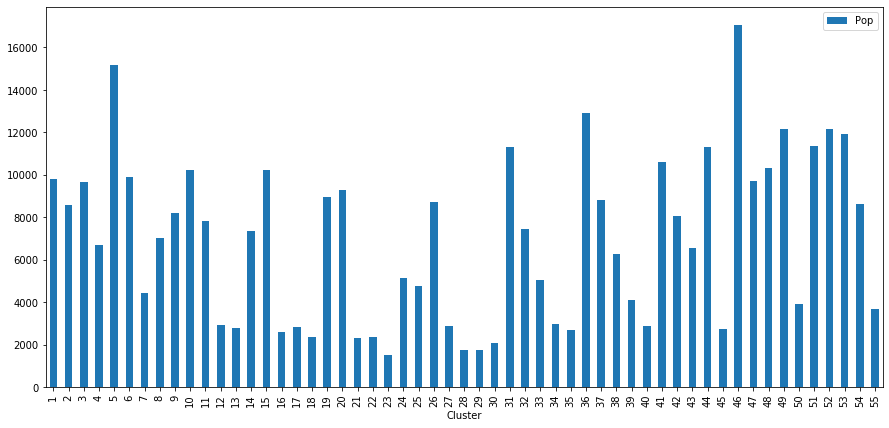

In [35]:
print ("Population Per Cluster".format(p))
df7.plot('Cluster', 'Pop', kind='bar',figsize=(15,7))

## Venue Data

In [21]:
# getting Ice Cream Shop location data from Foursquare

import requests # library to handle requests

CLIENT_ID = 'QJ5MJIKO1253TOENPVGJ4OUXDRYUEZSYM5ZE2WUE2W3UUELH' # your Foursquare ID
CLIENT_SECRET = 'NKUQN114MNFXDC5GH2BQ1HR5WJTIXL50OEYW4E1I5JBUP0OV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 15000 # define radius

latitude1 = 38.912440
longitude1 = -77.305795

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query=icecream'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude1, 
    longitude1, 
    radius, 
    LIMIT)

results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5ec91a1d98205d001bec3368'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'query': 'icecream',
  'totalResults': 67,
  'suggestedBounds': {'ne': {'lat': 39.04744013500013,
    'lng': -77.13262073077951},
   'sw': {'lat': 38.77743986499986, 'lng': -77.4789692692205}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4abd83ccf964a520c78a20e3',
       'name': 'Pitango Gelato',
       'location': {'address': '11942 Democracy Dr',
        'lat': 38.958326444494546,
        'lng': -77.35921141413789,
     

In [22]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
#Clean the json and structure it into a pandas dataframe

from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Pitango Gelato,Ice Cream Shop,38.958326,-77.359211
1,Ben & Jerry’s,Ice Cream Shop,38.858604,-77.355992
2,Freddy's Frozen Custard & Steakburgers,Ice Cream Shop,38.863287,-77.291277
3,Sugar Mama's Ice Cream,Ice Cream Shop,38.852587,-77.331517
4,Ben & Jerry’s,Ice Cream Shop,38.900370,-77.266271


In [24]:
#Checking dataframe
nearby_venues.info()
nearby_venues.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
name          67 non-null object
categories    67 non-null object
lat           67 non-null float64
lng           67 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.2+ KB


(67, 4)

In [68]:
# Add locations to our map

for lat, lng in zip(nearby_venues['lat'], nearby_venues['lng']):
    label = nearby_venues['lat']
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='Blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_FFX) 

# save as html 
map_FFX.save('map_FFX2.html')
    
map_FFX

### Computing the number of Ice Cream Shops within 1275 meters of each centroid

In [26]:
# add columns with radians for latitude and longitude

df8=df7
df9=nearby_venues

df8[['lat_radiansB','long_radiansB']] = (
    np.radians(df8.loc[:,['Lat','Long']])
)

df9[['lat_radiansA','long_radiansA']] = (
    np.radians(df9.loc[:,['lat','lng']])
)

dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')

#Matrix

dist_matrix = (dist.pairwise
    (df9[['lat_radiansA','long_radiansA']], 
     df8[['lat_radiansB','long_radiansB']])*6371393
)

# Note that 3959 is the radius of the earth in miles and 6371393 in meters
df_dist_matrix2 = (
    pd.DataFrame(dist_matrix,index=df9['name'],
                 columns=df8['Cluster'])
)

# table

df_dist_long2 = (
    pd.melt(df_dist_matrix2.reset_index(),id_vars='name')
)
df_dist_long2 = df_dist_long2.rename(columns={'value':'distance_m'})

df_dist_long2.tail()

,name,Cluster,distance_m
3680,Ciao Gelato,55,23809.360502
3681,La Moo Creamery,55,7582.002275
3682,Abbott's Frozen Custard,55,18858.898544
3683,Snow Moon,55,9818.347797
3684,Streatside Food Hall,55,24350.763946


In [27]:
# Including only Ice Cream Shops within 1250m from each centroid

df_dist2 = df_dist_long2[df_dist_long2['distance_m'] < 1250]
df_dist2.head()

,name,Cluster,distance_m
8,sweetFrog Premium Frozen Yogurt,1,1016.975766
144,Baskin-Robbins,3,431.920098
192,Zinga,3,579.491727
343,sweetFrog Premium Frozen Yogurt,6,797.168420
2120,Molly's Yogurt,32,888.638102


In [28]:
#get Ice cream shop info to the new table

df10 = df8.merge(df_dist2, left_on=['Cluster'], right_on=['Cluster'])
df10.drop(columns =["lat_radiansB","long_radiansB"], inplace = True)
df10.head()

,Cluster,Pop,Lat,Long,name,distance_m
0,1,9818.0,38.880000,-77.410000,sweetFrog Premium Frozen Yogurt,1016.975766
1,3,9656.0,38.912440,-77.410000,Baskin-Robbins,431.920098
2,3,9656.0,38.912440,-77.410000,Zinga,579.491727
3,6,9914.0,38.880000,-77.389159,sweetFrog Premium Frozen Yogurt,797.168420
4,32,7441.0,38.896222,-77.284955,Molly's Yogurt,888.638102


In [29]:
# group by cluster to get count of Ice Cream shops per cluster
df11 = df10.groupby(['Cluster'])['name'].count().reset_index()
df11.head()

,Cluster,name
0,1,1
1,3,2
2,6,1
3,32,1
4,37,5


In [30]:
# Crating a df of Clusters, Pops and Ice Cream Shop counts

df12 = df7.merge(df11,on=['Cluster'],how='left')

df12.rename(columns={'name':'Ice Cream Shops'}, inplace=True)
df12['Ice Cream Shops']= df12['Ice Cream Shops'].fillna(0)

df12.head()

,Cluster,Pop,Lat,Long,lat_radiansB,long_radiansB,Ice Cream Shops
0,1,9818.0,38.880000,-77.41,0.678584,-1.351059,1.0
1,2,8572.0,38.896222,-77.41,0.678867,-1.351059,0.0
2,3,9656.0,38.912440,-77.41,0.679150,-1.351059,2.0
3,4,6697.0,38.928655,-77.41,0.679433,-1.351059,0.0
4,5,15151.0,38.944866,-77.41,0.679716,-1.351059,0.0


In [31]:
df12['Shops per 10000 pops']=df12['Ice Cream Shops']*10000/df12['Pop']
df12.head()

,Cluster,Pop,Lat,Long,lat_radiansB,long_radiansB,Ice Cream Shops,Shops per 10000 pops
0,1,9818.0,38.880000,-77.41,0.678584,-1.351059,1.0,1.018537
1,2,8572.0,38.896222,-77.41,0.678867,-1.351059,0.0,0.000000
2,3,9656.0,38.912440,-77.41,0.679150,-1.351059,2.0,2.071251
3,4,6697.0,38.928655,-77.41,0.679433,-1.351059,0.0,0.000000
4,5,15151.0,38.944866,-77.41,0.679716,-1.351059,0.0,0.000000


Ice Cream Shops Per Cluster


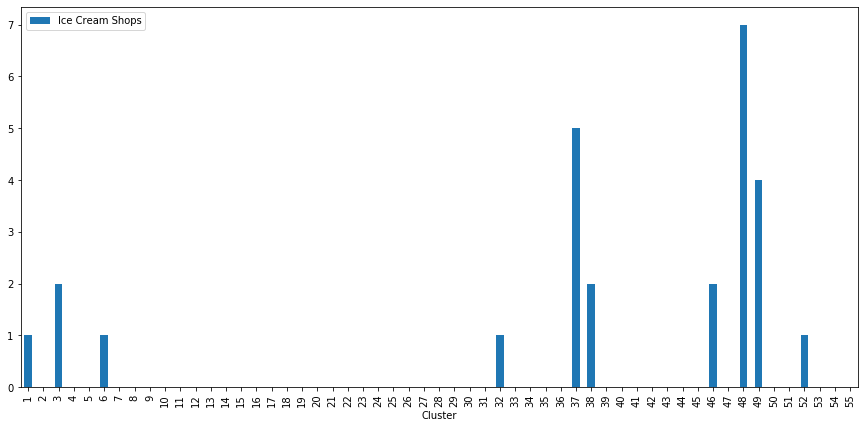

In [34]:
#Creating a bar Chart
print ("Ice Cream Shops Per Cluster".format(p))
df12.plot('Cluster', 'Ice Cream Shops', kind='bar',figsize=(15,7))

### Inporting County Land Use Data

In [36]:
# Import necessary modules
import geopandas as gpd

# Set filepath
fp = "FFX_Land_Use_Trimmed.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)
data.head()

,OBJECTID,ACRES,VALID_FROM,VALID_TO,CATEG,Shape__Are,Shape__Len,ID,geometry
0,2358,4.80972,1546214400000,1546318800000,Commercial,209511.304688,2036.967903,0,"POLYGON ((-77.26911 38.89861, -77.26931 38.898..."
1,2361,0.57077,1546214400000,1546318800000,Commercial,24862.960938,630.826742,0,"POLYGON ((-77.38097 38.90129, -77.38145 38.901..."
2,2363,7.56844,1546214400000,1546318800000,Commercial,329681.382813,2939.873316,0,"POLYGON ((-77.22452 38.90056, -77.22451 38.900..."
3,2364,10.77443,1546214400000,1546318800000,Commercial,469334.382813,3157.926594,0,"POLYGON ((-77.24276 38.89787, -77.24276 38.897..."
4,2365,4.69036,1546214400000,1546318800000,Commercial,204311.859375,2772.353873,0,"POLYGON ((-77.26632 38.90053, -77.26557 38.901..."


In [37]:
# Explore counts per Category
data.groupby('CATEG').count()

,OBJECTID,ACRES,VALID_FROM,VALID_TO,Shape__Are,Shape__Len,ID,geometry
CATEG,,,,,,,,
Agricultural,1,1,1,1,1,1,1,1
Commercial,230,230,230,230,230,230,230,230
High-density Residential,96,96,96,96,96,96,96,96
"Industrial, light and heavy",33,33,33,33,33,33,33,33
Institutional,198,198,198,198,198,198,198,198
Low-density Residential,2121,2121,2121,2121,2121,2121,2121,2121
Medium-density Residential,1710,1710,1710,1710,1710,1710,1710,1710
"Open land, not forested or developed",1363,1363,1363,1363,1363,1363,1363,1363
Public,17,17,17,17,17,17,17,17


In [38]:
Commercial = data.loc[data['CATEG'] == 'Commercial']
Commercial.head()

,OBJECTID,ACRES,VALID_FROM,VALID_TO,CATEG,Shape__Are,Shape__Len,ID,geometry
0,2358,4.80972,1546214400000,1546318800000,Commercial,209511.304688,2036.967903,0,"POLYGON ((-77.26911 38.89861, -77.26931 38.898..."
1,2361,0.57077,1546214400000,1546318800000,Commercial,24862.960938,630.826742,0,"POLYGON ((-77.38097 38.90129, -77.38145 38.901..."
2,2363,7.56844,1546214400000,1546318800000,Commercial,329681.382813,2939.873316,0,"POLYGON ((-77.22452 38.90056, -77.22451 38.900..."
3,2364,10.77443,1546214400000,1546318800000,Commercial,469334.382813,3157.926594,0,"POLYGON ((-77.24276 38.89787, -77.24276 38.897..."
4,2365,4.69036,1546214400000,1546318800000,Commercial,204311.859375,2772.353873,0,"POLYGON ((-77.26632 38.90053, -77.26557 38.901..."


In [39]:
#creating commercial areas shape file only
Commercial.to_file('FFX_Commercial.shp', driver='ESRI Shapefile')

In [69]:
#Converted shp to Geojson file
#Map Commercial areas along with Pops and Ice Cream Shops

print ("Blue = Commercial Area".format(p))
print ("Purple = Ice Cream Shop".format(p))
print ("Red = Clusters 1-55".format(p))

map = folium.Map(location= FFX, zoom_start=12)

GeoJson('FFX_Commercial.geojson').add_to(map)

for Lat, Long, Cluster in zip(df_Centroids['Lat'], df_Centroids['Long'], df_Centroids['Cluster']):
    popup = df_Centroids['Cluster']
    popup = folium.Popup(label, parse_html=True)
    folium.CircleMarker([Lat, Long],radius=35,color='Red',fill='Pink').add_to(map) 
    folium.Marker(location=[Lat,Long],
                  icon=folium.DivIcon(html=f"""<div style="font-style: Bold;font-size: 12pt">{"{:.0f}".format(Cluster)}</div>""")).add_to(map)

for lat, lng in zip(nearby_venues['lat'], nearby_venues['lng']):
    label = nearby_venues['lat']
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=3, popup=label, color='Purple', fill=True, parse_html=False).add_to(map)

# save as html 
map.save('map_final.html')

map

        

Blue = Commercial Area
Purple = Ice Cream Shop
Red = Clusters 1-55


## Results and Discussion <a name="results"></a>

As per the map above, the commercial areas available within the search area are limited to 32 of the 55 clusters:
Clusters 1,3,5,6,7,9,10,11,14,15,19,20,25,26,30,31,32,37,38,39,41,42,43,44,46,47,48,49,50,52,53 and 54. We would need to limit our selection to these 32 clusters since we can't open an Ice Cream Shop in residential areas.

The total population per cluster as well as Ice Cream shops per capita are illustrated in the Charts below.

Based on the these data, we further eliminate 10 Clusters 1,3,6,32,37,38,46,48,49 and 52 since they have the highest Ice cream shops per capita.

Out of the remaining 22 clusters where coomercial area is available and ice cream shops per capita is low, the following clusters stand out as best possible locations: 5,10,14,19,20,26,31,41,44,53,54

Population Per Cluster


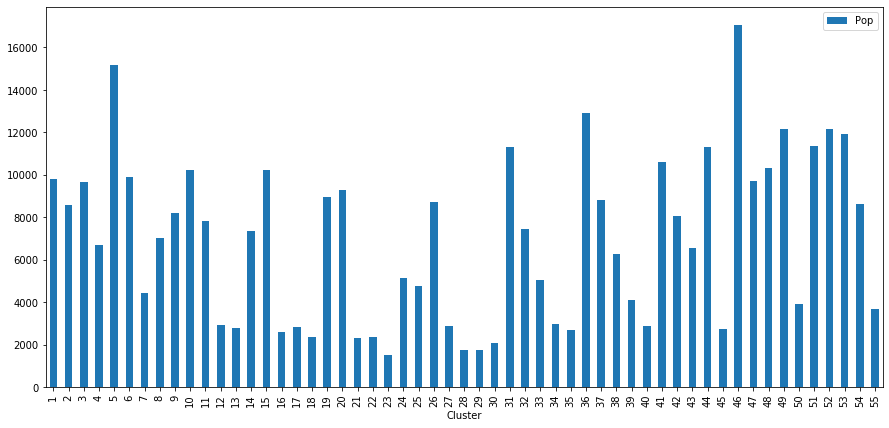

In [42]:
print ("Population Per Cluster".format(p))
df7.plot('Cluster', 'Pop', kind='bar',figsize=(15,7))

Shops per 10000 pops


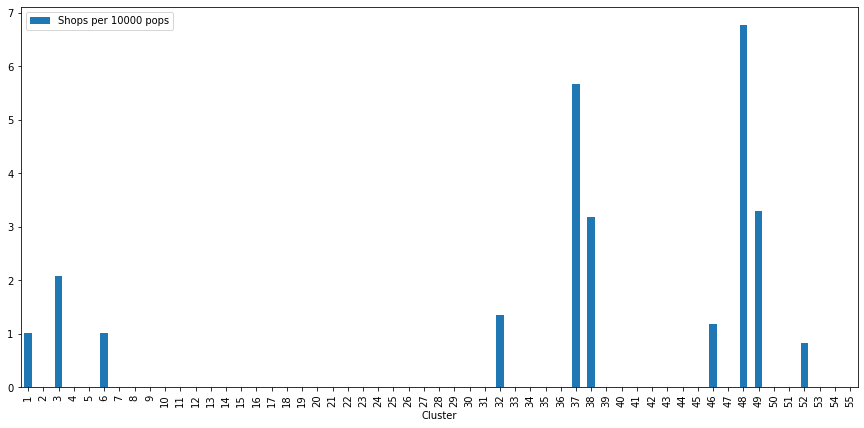

In [43]:
#Creating a bar Chart for % shops per pop
print ("Shops per 10000 pops".format(p))
df12.plot('Cluster', 'Shops per 10000 pops', kind='bar',figsize=(15,7))

## Conclusion <a name="conclusion"></a>

Further analaysis of the remaining 11 clusters based on general Knowledge of foot traffic and adjacent clusters population reveals that the top 3 best locations for an Ice Cream Shop are clusters: 5, 44 and 47

Our methodology and final selection will be communicated to the entrepreneur for feedback. Additional study can be conducted as needed based on the feedback received.

 